In [13]:
import helpers.qr 
import helpers.wavelet
import helpers.wm
import helpers.plots

### Piston

In [15]:
import numpy as np
#load .npy file
#need to change this to relative
piston = np.load('../data/npy/smallPiston.npy')

piston.shape

(207, 232, 232)

In [17]:
helpers.plots.ivyplot(piston)

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

0

In [19]:
# Normalizing the data
piston_min = piston.min()
piston_max = piston.max()
normalized_piston_data = (piston - piston_min) / (piston_max - piston_min)
normalized_piston_data = (normalized_piston_data * 255).astype(np.uint8)


In [20]:
piston= normalized_piston_data
print(f"Minimum Value: {piston.min()}")
print(f"Maximum Value: {piston.max()}")
print(f"Mean Value: {piston.mean()}")
print(f"Median Value: {np.median(piston)}")
print(f"Standard Deviation: {piston.std()}")

Minimum Value: 0
Maximum Value: 255
Mean Value: 6.2570242357269645
Median Value: 0.0
Standard Deviation: 17.817841086233784


In [36]:
plotting=[]
for two_dim in piston:
  if two_dim.mean()>2:
    plotting.append(two_dim)
    
plotting

[array([[1, 0, 0, ..., 2, 0, 2],
        [2, 1, 0, ..., 1, 0, 2],
        [2, 1, 0, ..., 1, 1, 2],
        ...,
        [1, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 2, 1]], dtype=uint8),
 array([[1, 2, 1, ..., 1, 2, 0],
        [1, 0, 1, ..., 1, 1, 1],
        [0, 1, 1, ..., 2, 2, 2],
        ...,
        [2, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 1, 0, ..., 1, 1, 0]], dtype=uint8),
 array([[2, 2, 2, ..., 1, 1, 0],
        [0, 1, 1, ..., 2, 1, 1],
        [0, 1, 1, ..., 2, 1, 1],
        ...,
        [0, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 1],
        [1, 1, 1, ..., 2, 0, 0]], dtype=uint8),
 array([[0, 1, 1, ..., 1, 1, 0],
        [1, 1, 0, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 0, 0]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 0, 0],
        [0, 1, 0, ..., 2, 0, 1],
        [0, 1, 1, ..., 1, 1, 2

IndexError: index 64 is out of bounds for axis 0 with size 64

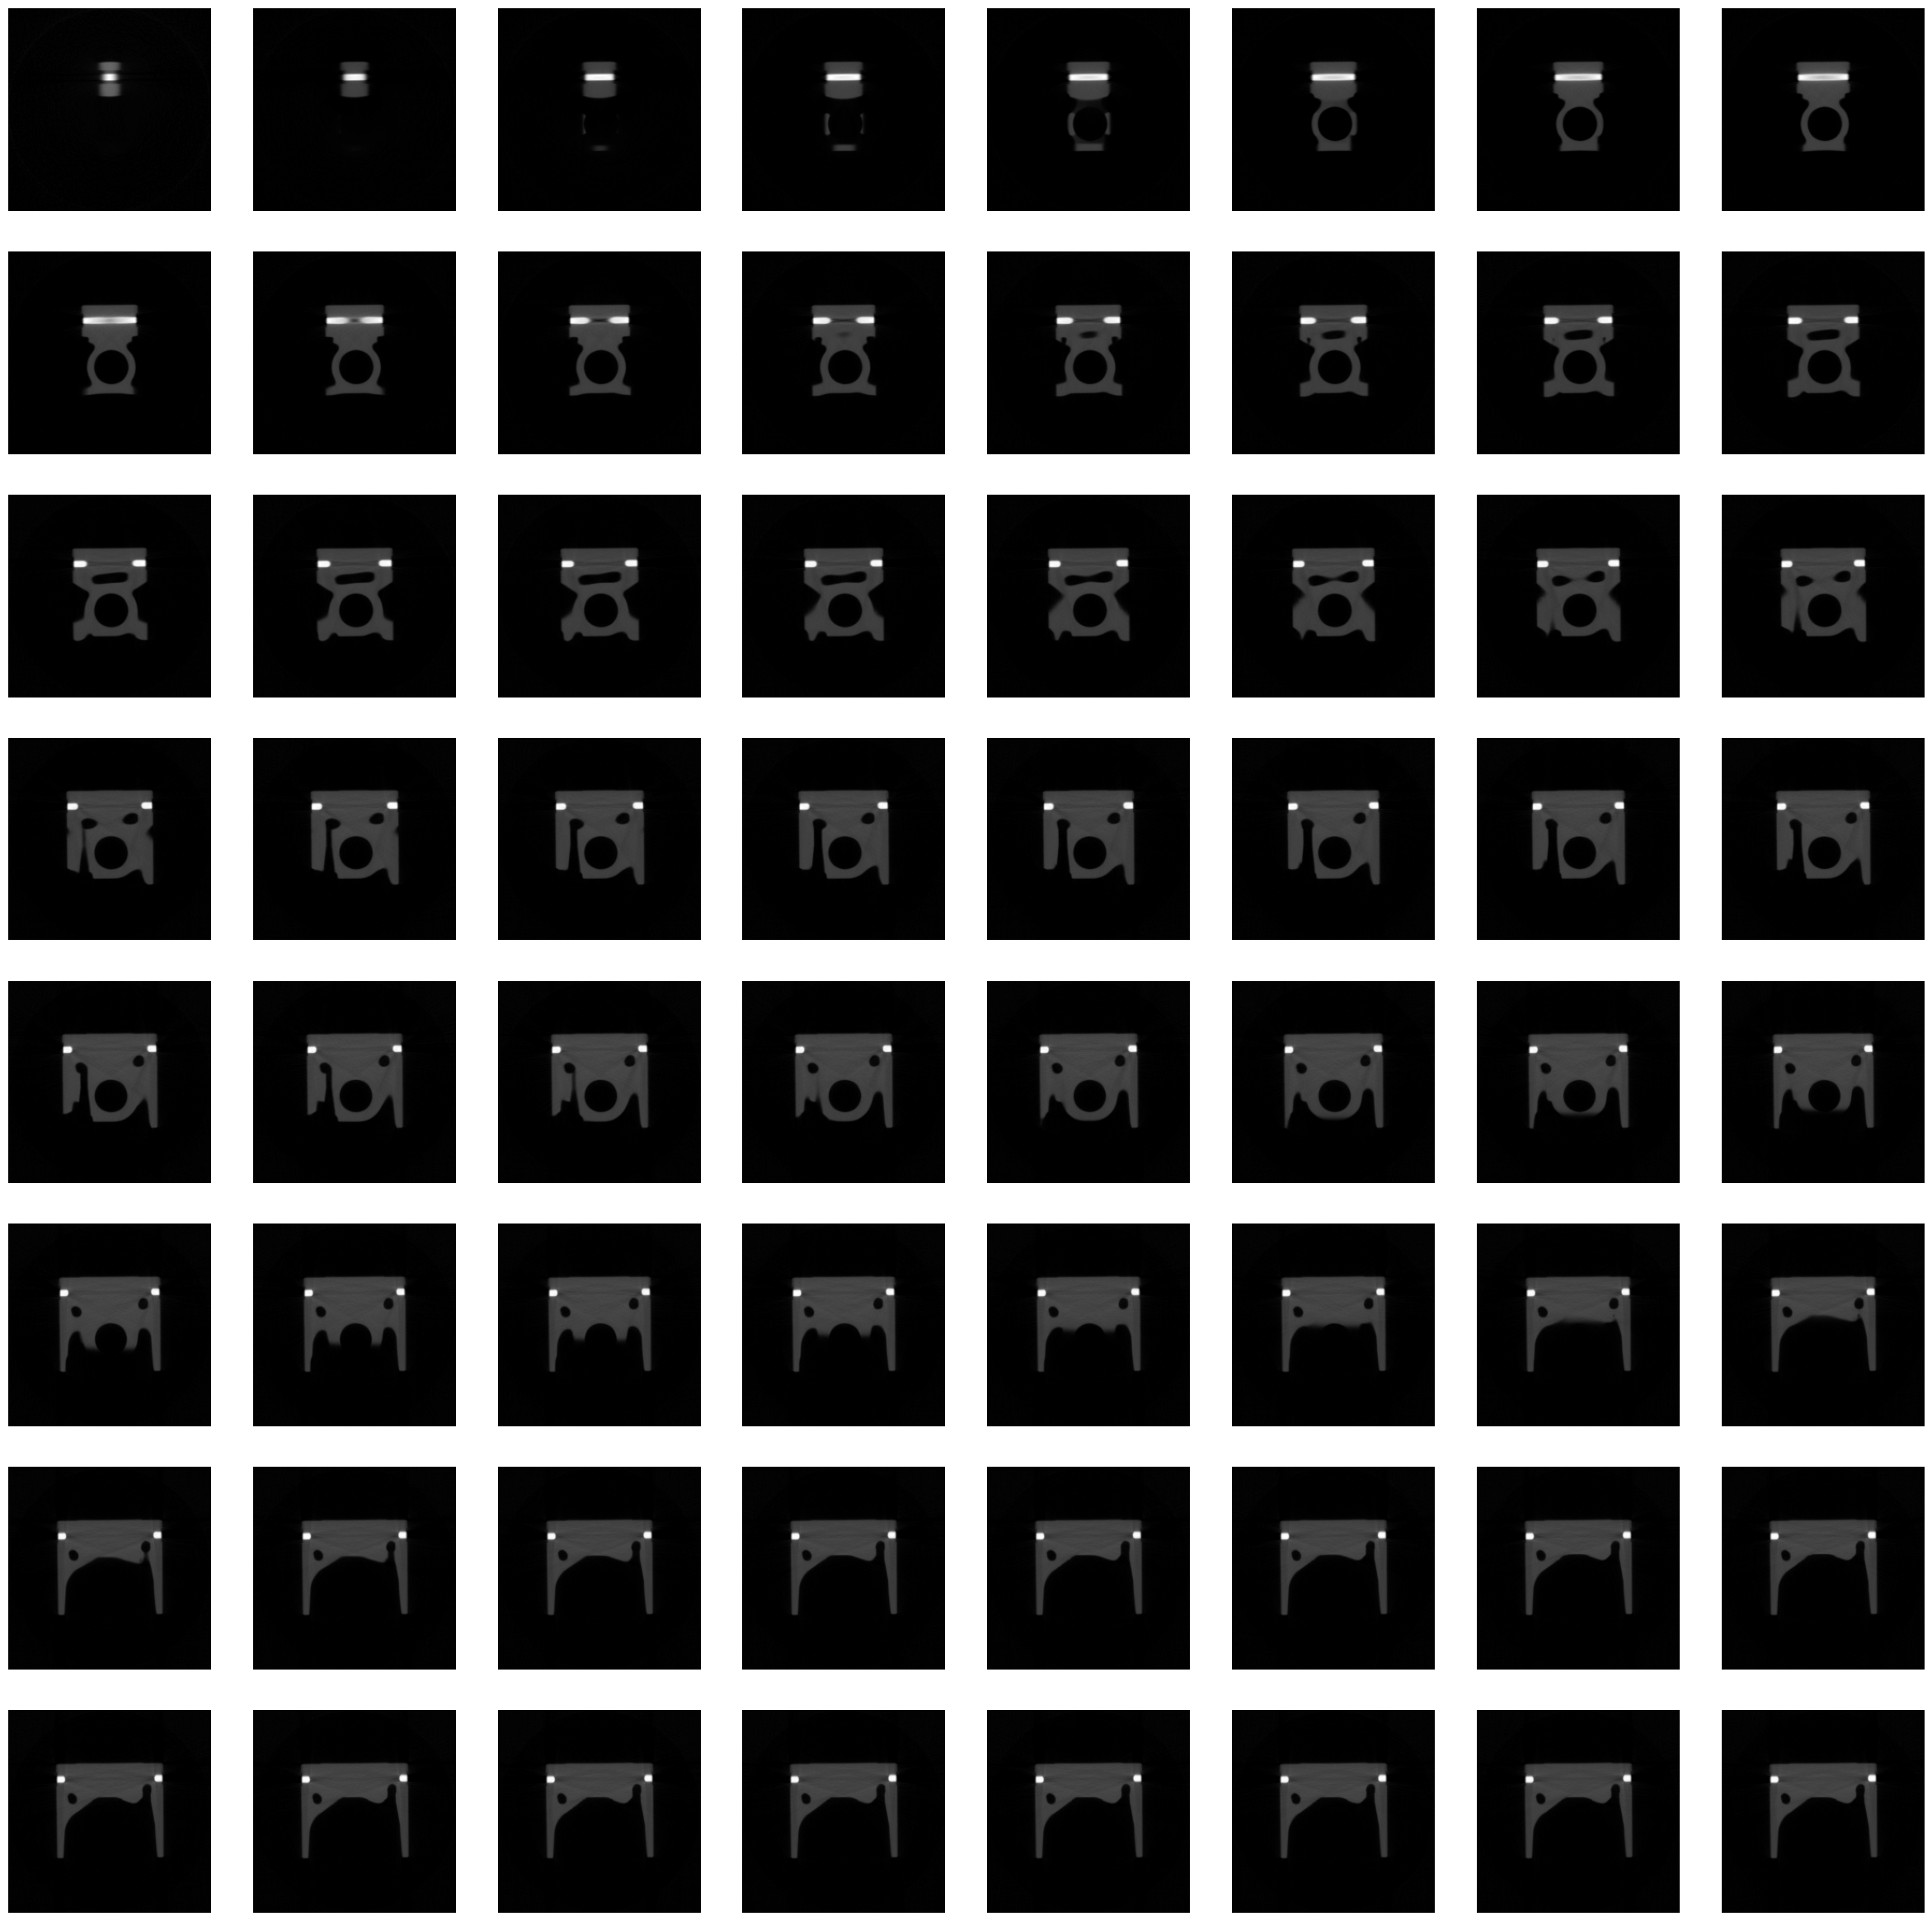

In [37]:
import matplotlib.pyplot as plt
import numpy as np



num_images = len(plotting)

# Create a subplot grid with 16 rows and 16 columns
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(30, 30))

# Flatten the axes array => easier to iterate over
axes = axes.flatten()

# Iterate over the images and plot them on the corresponding subplot
for i in range(num_images):
    img = plotting[i]  # Get the i-th image
    ax = axes[i]     # Get the corresponding subplot

    # Plot the image on the subplot
    ax.imshow(img, cmap='gray')
    ax.axis('off')   

plt.tight_layout()  
plt.show()         


### INJECTOR 

In [21]:
injector = np.load('../data/npy/injector.npy')

injector.shape

(60, 60, 60)

In [24]:
helpers.plots.ivyplot(injector)

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

0

In [25]:
print(f"Minimum Value: {injector.min()}")
print(f"Maximum Value: {injector.max()}")
print(f"Mean Value: {injector.mean()}")
print(f"Median Value: {np.median(injector)}")
print(f"Standard Deviation: {injector.std()}")

Minimum Value: 0
Maximum Value: 255
Mean Value: 22.496412037037036
Median Value: 0.0
Standard Deviation: 60.190371108372126


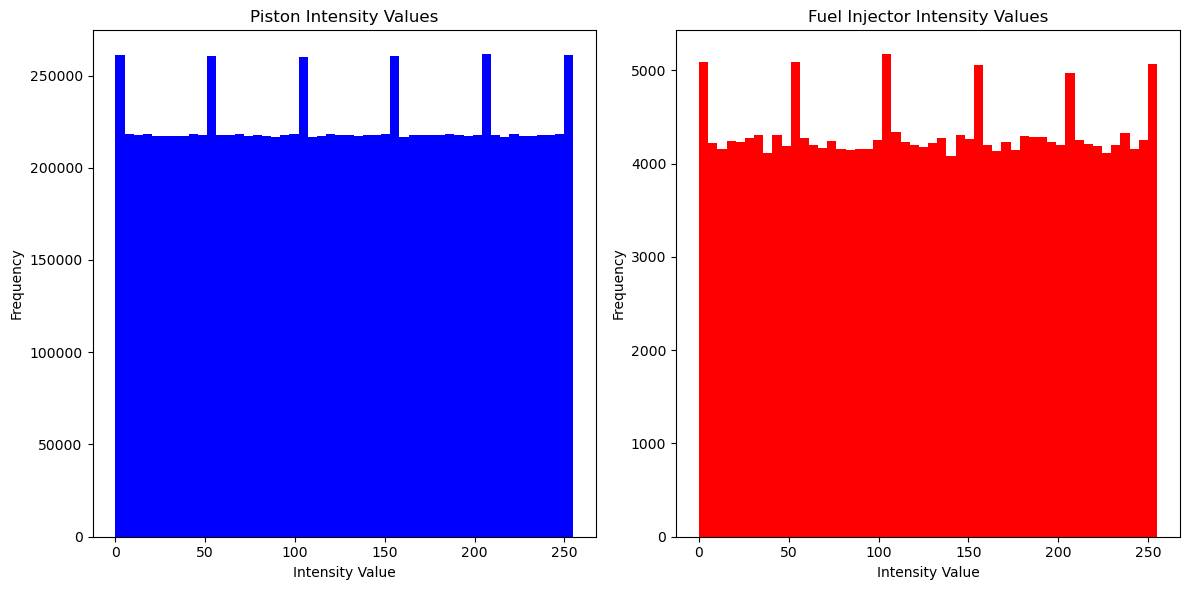

In [40]:


# Creating subplots for each histogram
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for the piston
axs[0].hist(piston.ravel(), bins=50, color='blue')
axs[0].set_title('Piston Intensity Values')
axs[0].set_xlabel('Intensity Value')
axs[0].set_ylabel('Frequency')

# Histogram for the fuel injector
axs[1].hist(injector.ravel(), bins=50, color='red')
axs[1].set_title('Fuel Injector Intensity Values')
axs[1].set_xlabel('Intensity Value')
axs[1].set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### GEAR 

In [4]:
gear = np.load('../data/npy/gear.npy')

gear.shape

(4000, 3)

In [5]:
gear[0]

array([ 5.5,  0. , -1. ])

In [6]:
gear = np.load('../data/npy/gear_3d_array_uint8_small.npy')

gear.shape


(40, 40, 40)

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

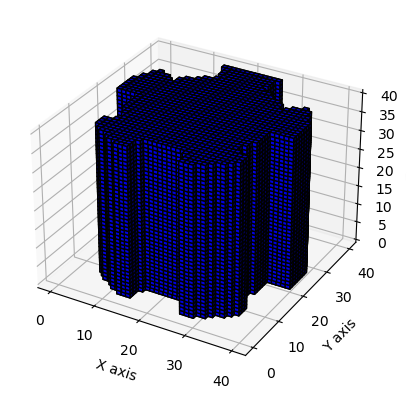

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(gear, facecolors='blue', edgecolor='k')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [10]:
import numpy as np
import ipyvolume as ipv

toplot=gear
toplot = toplot- np.min(toplot)
toplot = toplot/ np.max(toplot)

#dataRoi<<

# visualize
ipv.figure()
ipv.quickvolshow(toplot, level=[0.2, 0.8], opacity=0.1, level_width= 0.1, data_min=0, data_max=1)
ipv.view(-30, 40)
ipv.show()

C:\Users\moham\anaconda3\envs\thesis\Lib\site-packages\ipyvolume\serialize.py:102: RuntimeWarning: invalid value encountered in cast
  subdata[..., i] = ((gradient[i][zindex] / 2.0 + 0.5) * 255).astype(np.uint8)


Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

In [11]:
gear

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 